# Mixed Analysis of Variance (MANOVA)

In [1]:
# import libraries 
import numpy as np 
import matplotlib.pyplot as plt 
plt.rcParams.update({'font.size': 16}) 
import savingfigR as sf 
import pingouin as pg 
import pandas as pd 
from statsmodels.graphics.factorplots import interaction_plot
import scipy.stats as stats
import cohens_d as cD
from statsmodels.sandbox.stats.multicomp import multipletests

## Setting up the Data

In [2]:
pain = np.array([8,5,3,7,6,6,8,7,6,7,5,4,6,5,2,5,5,4,5,4,3,6,3,2])
treatment = np.array(['treat1', 'treat2', 'treat3']*8).astype('str')
# treatment = np.repeat([0, 1, 2], 8)
age = np.hstack([[1]*12, [2]*12]) # dummy code [0=old, 1=young]
# age = np.concatenate((np.repeat('old', 12), np.repeat('young', 12)))
subject = np.hstack([[1]*3,[2]*3,[3]*3,[4]*3,[5]*3,[6]*3,[7]*3,[8]*3])
# subject = np.concatenate((np.repeat(1,3),np.repeat(2,3),np.repeat(3,3),np.repeat(4,3),np.repeat(5,3),np.repeat(6,3),np.repeat(7,3),np.repeat(8,3)))
mydata = pd.DataFrame({'pain':pain, 'treatment':treatment, 'age':age, 'subject':subject})

In [3]:
mydata.head(5)

,pain,treatment,age,subject
0,8,treat1,1,1
1,5,treat2,1,1
2,3,treat3,1,1
3,7,treat1,1,2
4,6,treat2,1,2


## Plot Data

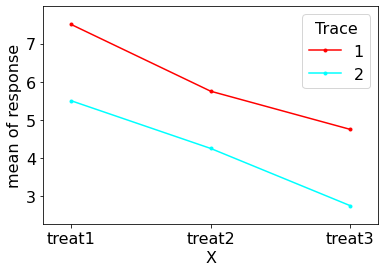

In [4]:
fig = interaction_plot(treatment, age, pain)
plt.show()

sf.best_save(fig, 'interaction')

## Mixed ANOVA Output

In [5]:
res_aov = pg.mixed_anova(data=mydata, dv='pain', within='age', subject='subject', between='treatment')
print(res_aov) # unsure why this isn't workin g

ValueError: cannot convert float NaN to integer

## Mixed ANOVA - GG Corrections

In [ ]:
res_aov = pg.mixed_anova(data=mydata, dv='pain', within='age', subject='subject', between='treatment', correction=True)
print(res_aov) # unsure why this isn't workin g

ValueError: cannot convert float NaN to integer

## Organize Data (2x3 design)

In [6]:
O1 = np.array([pain[0],pain[3],pain[6],pain[9]]) # old, treatment 1
O2 = np.array([pain[1],pain[4],pain[7],pain[10]])
O3 = np.array([pain[2],pain[5],pain[8],pain[11]])
Y1 = np.array([pain[12],pain[15],pain[18],pain[21]])
Y2 = np.array([pain[13],pain[16],pain[19],pain[22]])
Y3 = np.array([pain[14],pain[17],pain[20],pain[23]]) # young, treatment 3

## Organize Data - Main Effects of Age

In [7]:
Old = np.concatenate((O1, O2, O3))
Young = np.concatenate((Y1, Y2, Y3))

## Testing normality for Main Effect of Age

In [8]:
stats.shapiro(Old)

ShapiroResult(statistic=0.9411451816558838, pvalue=0.5130491256713867)

In [9]:
stats.shapiro(Young)

ShapiroResult(statistic=0.9056113362312317, pvalue=0.18737076222896576)

## Follow up Mean Comparisons for Main Effect of Age

In [10]:
pOvY = stats.ttest_ind(Old, Young, alternative = "two-sided")
print(pOvY)

Ttest_indResult(statistic=3.0508510792387598, pvalue=0.005859926225619057)


## Sample Effect Size for Main Effect of Age

In [11]:
cD.cohensd_2ind(Old, Young)

1.2181276639064296

## Organize Data - Main Effects of Treatment

In [12]:
treat1 = np.concatenate([O1, Y1]) # time 1
treat2 = np.concatenate([O2, Y2]) # time 2
treat3 = np.concatenate([O3, Y3]) # time 3

## Testing normality for Main Effect of Treatment

In [13]:
stats.shapiro(treat2-treat1)

ShapiroResult(statistic=0.859948992729187, pvalue=0.11993449926376343)

In [14]:
stats.shapiro(treat3-treat1)

ShapiroResult(statistic=0.9198123216629028, pvalue=0.4283426105976105)

In [15]:
stats.shapiro(treat3-treat2) # josh typo

ShapiroResult(statistic=0.8260416388511658, pvalue=0.05398723855614662)

## Follow up Mean Comparisons for Main Effect of Treatment

In [16]:
p1v2 = stats.ttest_rel(treat1, treat2, alternative = "two-sided")[1] #
p1v3 = stats.ttest_rel(treat1, treat3, alternative = "two-sided")[1] #
p2v3 = stats.ttest_rel(treat2, treat3, alternative = "two-sided")[1] #
pvals = np.array([p1v2, p1v3, p2v3])
p_adjust = multipletests(pvals, method='h')
print(p_adjust[1][:])

[0.01053138 0.00364891 0.01053138]


## Sample Effect Size for Main Effect of Treatment

In [17]:
cD.cohensd_2paired(treat1, treat2)

1.254990039801113

In [18]:
cD.cohensd_2paired(treat1, treat3)

1.9319823298493632

In [19]:
cD.cohensd_2paired(treat2, treat3)

0.8185863353623665

## Mixed ANOVA Interactions - Normality

In [20]:
stats.shapiro(O1)

ShapiroResult(statistic=0.728634238243103, pvalue=0.02385682798922062)

In [21]:
stats.shapiro(O2)

ShapiroResult(statistic=0.8633691072463989, pvalue=0.27245327830314636)

In [22]:
stats.shapiro(O3)

ShapiroResult(statistic=0.8494024276733398, pvalue=0.2242307811975479)

In [23]:
stats.shapiro(Y1)

ShapiroResult(statistic=0.728634238243103, pvalue=0.02385682798922062)

In [24]:
stats.shapiro(Y2)

ShapiroResult(statistic=0.8633691072463989, pvalue=0.27245327830314636)

In [25]:
stats.shapiro(Y3)

ShapiroResult(statistic=0.8633691072463989, pvalue=0.27245327830314636)

## Mixed ANOVA Interactions (Examining Age) - Mean Comparisons

In [26]:
p1v2 = stats.ttest_ind(O1, Y1, alternative="two-sided")[1] #
p1v3 = stats.ttest_ind(O2, Y2, alternative="two-sided")[1] #
p2v3 = stats.ttest_ind(O3, Y3, alternative="two-sided")[1] #
pvals = np.array([p1v2, p1v3, p2v3])
p_adjust = multipletests(pvals, method='h')
print(p_adjust[1][:])

[0.00814105 0.1312777  0.1312777 ]


## Mixed ANOVA Interactions (Examining Age) - Effect Size

In [27]:
cD.cohensd_2ind(O1, Y1)

3.0983866769659336

In [28]:
cD.cohensd_2ind(O2, Y2)

1.4012980994907414

In [29]:
cD.cohensd_2ind(O3, Y3)

1.4855627054164149

## Mixed ANOVA Interactions (Examining Treatment) - Mean Comparisons

In [30]:
pO1vO2 = stats.ttest_rel(O1, O2, alternative="two-sided")[1] #
pO1vO3 = stats.ttest_rel(O1, O3, alternative="two-sided")[1] #
pO2vO3 = stats.ttest_rel(O2, O3, alternative="two-sided")[1] #
pY1vY2 = stats.ttest_rel(Y1, Y2, alternative="two-sided")[1] #
pY1vY3 = stats.ttest_rel(Y1, Y3, alternative="two-sided")[1] #
pY2vY3 = stats.ttest_rel(Y2, Y3, alternative="two-sided")[1] #
pvals = np.array([pO1vO2, pO1vO3, pO2vO3, pY1vY2, pY1vY3, pY2vY3])
p_adjust = multipletests(pvals, method='h')
print(p_adjust[1][:])

[0.21048909 0.21048909 0.21048909 0.21048909 0.21048909 0.21048909]


## Mixed ANOVA Interactions (Examining Treatment) - Effect Size

In [31]:
cD.cohensd_2paired(O1, O2)

2.1603643668589876

In [32]:
cD.cohensd_2paired(O1, O3)

2.48670574562281

In [33]:
cD.cohensd_2paired(O3, O2)

0.6235664845584089

In [34]:
cD.cohensd_2paired(Y1, Y2)

1.6027390276068052

In [35]:
cD.cohensd_2paired(Y1, Y3)

3.578086220948352

In [36]:
cD.cohensd_2paired(Y3, Y2)

1.5666989036012806

## Power Analysis on ANOVA

In [37]:
# nothing 